In [113]:
#tool box
import pandas as pd
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches

#stylin'
plt.style.use('seaborn-darkgrid')

#import data
data=pd.read_excel('rivers_only.xlsx')

In [114]:
#drop data without DIC and Alk
data1=pd.read_excel('rivers_only.xlsx')
df = pd.DataFrame(data1)
data=df.dropna(subset=['DIC_transformed','Alk_trans'])


# testing the effects of temperature on pyco2sys calculations

In [115]:
# T= 25
import PyCO2SYS as pyco2

kwargs = dict(
    par1 = data['Alk_trans'],
    par1_type = 1, #alkalinity
    par2 = data['DIC_transformed'],
    par2_type = 2, 
    salinity = 0,
    temperature = 25,
)

# Run PyCO2SYS
results = pyco2.sys(**kwargs)
pH_calc = np.array(results['pH'])
#ph_res
res_ph = data['pH']-pH_calc


#calculate d13C_calc
T=25    #degree C
S=0    #salinity rivers = 0
TK = T + 273.15 
DIC=np.array(data['DIC_transformed'])

K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))


H=10**(-pH_calc)  

HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
CO2aq=-9
CO3=-2
HCO3=0
d13C_DIC_pred = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3
#d13C_res
res_d13C = data['d13C_DIC']-d13C_DIC_pred
print(len(res_ph))
print(len(res_d13C))
print(len(data['pH']))
print

413
413
413


<function print>

In [158]:
# T = 0


import PyCO2SYS as pyco2

kwargs = dict(
    par1 = data['Alk_trans'],
    par1_type = 1, #alkalinity
    par2 = data['DIC_transformed'],
    par2_type = 2, 
    salinity = 0,
    temperature = 0,
)

# Run PyCO2SYS
results = pyco2.sys(**kwargs)
pH_calc2 = np.array(results['pH'])
#ph_res
res_ph2 = data['pH']-pH_calc2

#calculate d13C_calc
T=0    #degree C
S=0    #salinity rivers = 0
TK = T + 273.15 
DIC=np.array(data['DIC_transformed'])

K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))


H=10**(-pH_calc)  

HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
CO2aq=-9
CO3=-2
HCO3=0
d13C_DIC_pred = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3
#d13C_res
res_d13C2 = data['d13C_DIC']-d13C_DIC_pred
print(np.mean(res_d13C))
print(np.mean(res_d13C2))

-8.069677304751558
-7.919648935568828


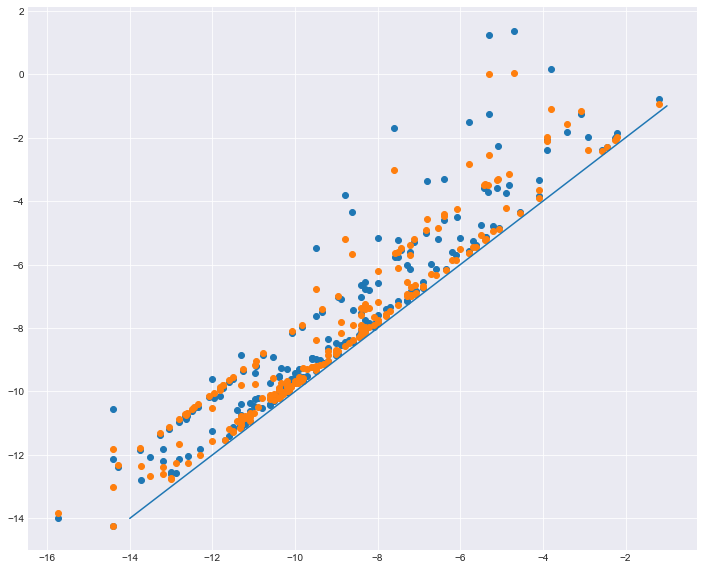

In [159]:
#change temp until points fit line best
plt.figure(figsize=(12,10))
x=data['d13C_DIC']
y=res_d13C2
y3=res_d13C
plt.scatter(x,y)
plt.scatter(x,y3)
x2=np.arange(-14,0,1)
y2=np.arange(-14,0,1)
plt.plot(x2,y2)

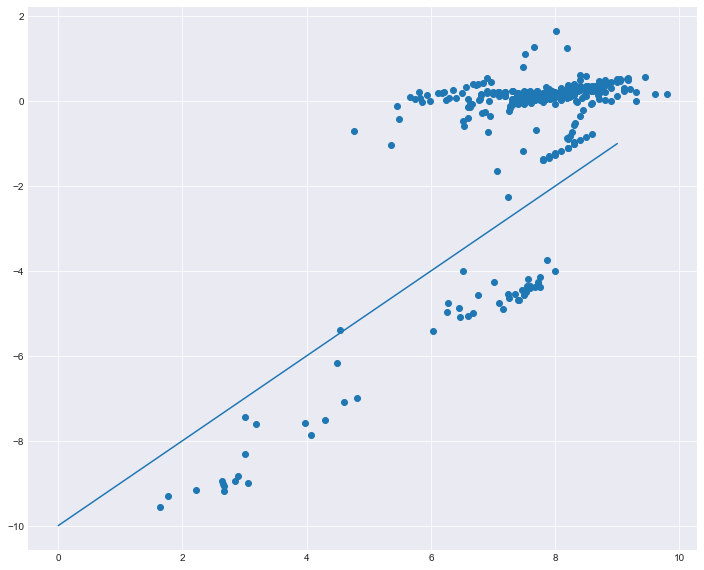

In [117]:
#ph meas vs ph res
plt.figure(figsize=(12,10))
x=data['pH']
y=res_ph2
plt.scatter(x,y)
x2=np.arange(0,10,1)
y2=np.arange(-10,0,1)
plt.plot(x2,y2)

In [118]:
#T=25
fun=stats.gaussian_kde(res_d13C)
x=np.arange(np.min(res_d13C),np.max(res_d13C),0.1)
y=fun(x)

#T=0
fun=stats.gaussian_kde(res_d13C2)
x2=np.arange(np.min(res_d13C2),np.max(res_d13C2),0.1)
y2=fun(x2)
print(len(res_d13C))

413


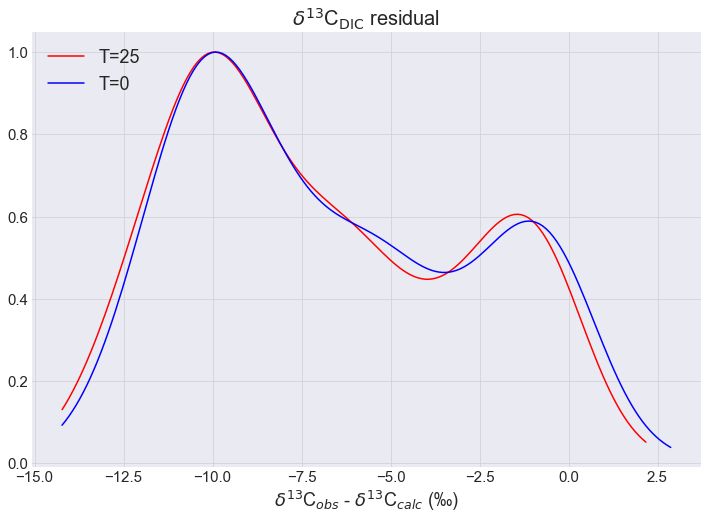

In [119]:
#KDE d13C
plt.figure(figsize=(12,8))


plt.plot(x,y/np.max(y),color='r',label='T=25')
# plt.fill_between(x,y/np.max(y),color='c',alpha=.75)

plt.plot(x2,y2/np.max(y2),color='b',label='T=0')
# plt.fill_between(x2,y2/np.max(y2),color='b',alpha=.75)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('$\delta^{13}$C$_{obs}$ - $\delta^{13}$C$_{calc}$ (‰)',fontsize=18)
plt.title('$\delta^{13}$C$_{\mathrm{DIC}}$ residual', fontsize=20)
plt.grid(color='lightgrey')
plt.legend(loc='upper left',fontsize=18,frameon=False)

In [120]:
#drop pH_res nans
a=np.array(res_ph)
a = a[np.logical_not(np.isnan(a))]
print(len(a))
b=np.array(res_ph2)
b = b[np.logical_not(np.isnan(b))]
print(np.mean(res_ph))
print(np.mean(res_ph2))

386
-0.3397916716056625
-0.7291885172192005


In [121]:

#T=25
fun=stats.gaussian_kde(a)
x=np.arange(np.min(a),np.max(a),0.1)
y=fun(x)

#T=0
fun=stats.gaussian_kde(b)
x2=np.arange(np.min(b),np.max(b),0.1)
y2=fun(x2)


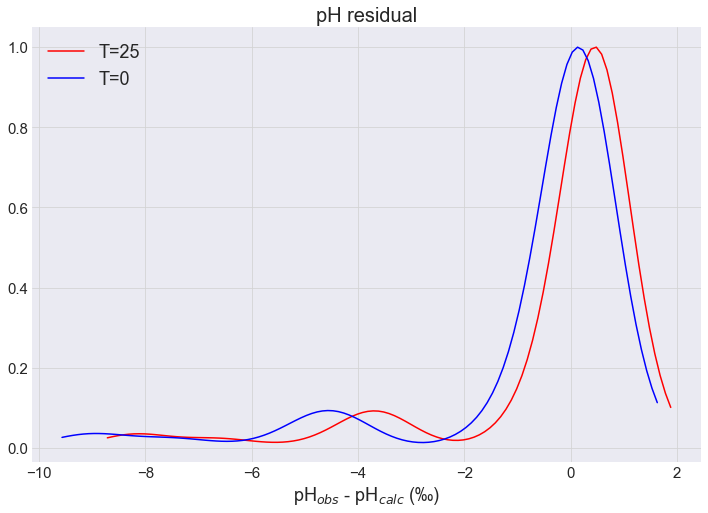

In [122]:
#KDE pH

plt.figure(figsize=(12,8))


plt.plot(x,y/np.max(y),color='r',label='T=25')
# plt.fill_between(x,y/np.max(y),color='c',alpha=.75)

plt.plot(x2,y2/np.max(y2),color='b',label='T=0')
# plt.fill_between(x2,y2/np.max(y2),color='b',alpha=.75)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('pH$_{obs}$ - pH$_{calc}$ (‰)',fontsize=18)
plt.title('pH residual', fontsize=20)
plt.grid(color='lightgrey')
plt.legend(loc='upper left',fontsize=18,frameon=False)

In [123]:
#plot it on ph d13C plot..

#make purple equil line

T=0    #degree C
S=0    #PSS
DIC=2100 #micromol/kg
TK = T + 273.15 
K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))
    
pH = np.arange(4,11,.1)
H=10**(-pH)  

HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
CO2aq=-9
CO3=-2
HCO3=0
d13C_DIC = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3


413

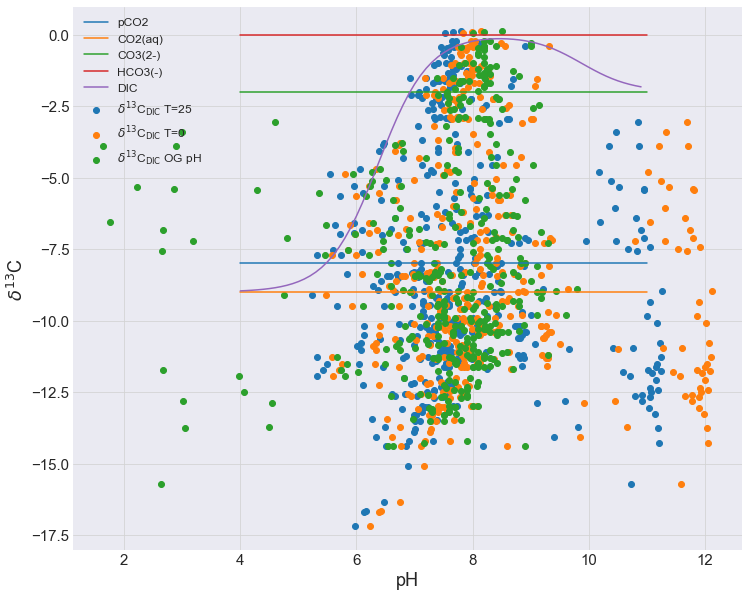

In [124]:
pCO2=(-8,-8)
CO2aq=(-9,-9)
CO3=(-2,-2)
HCO3=(0,0)
ph=(4,11)


plt.figure(figsize=(12,10))
plt.plot(ph,pCO2,label='pCO2')
plt.plot(ph,CO2aq, label='CO2(aq)')
plt.plot(ph,CO3, label='CO3(2-)')
plt.plot(ph,HCO3, label='HCO3(-)')
plt.plot(pH,d13C_DIC,label='DIC')
plt.scatter(pH_calc,data['d13C_DIC'],label='$\delta^{13}$C$_{\mathrm{DIC}}$ T=25')
plt.scatter(pH_calc2,data['d13C_DIC'],label='$\delta^{13}$C$_{\mathrm{DIC}}$ T=0')
plt.scatter(data['pH'],data['d13C_DIC'],label='$\delta^{13}$C$_{\mathrm{DIC}}$ OG pH')



plt.xlabel('pH',fontsize=18)
plt.ylabel('$\delta^{13}$C',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')
plt.legend(loc='best',fontsize='large',frameon=False)

#plot where there is alk, DIC and ph 
len(data['pH'])

# indexing data to look at off values

In [ ]:
#ph calc >10

#res_d13C = 0 or =/- .1 per mil
# data['res'] = res_d13C
idx=(np.abs(res_d13C<.1))
print(set(data['doc_id'][idx]))

In [126]:
#look at this paper!!
idx=data['doc_id']=='54de3582e138238a47f96ac2'

import PyCO2SYS as pyco2

kwargs = dict(
    par1 = data['Alk_trans'][idx],
    par1_type = 1, #alkalinity
    par2 = data['DIC_transformed'][idx],
    par2_type = 2, 
    salinity = 0,
    temperature = 0,
)

# Run PyCO2SYS
results = pyco2.sys(**kwargs)
pH_calc = np.array(results['pH'])
#ph_res
res_ph = data['pH'][idx]-pH_calc

#calculate d13C_calc
T=0    #degree C
S=0    #salinity rivers = 0
TK = T + 273.15 
DIC=np.array(data['DIC_transformed'][idx])

K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))


H=10**(-pH_calc)  

HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
CO2aq=-9
CO3=-2
HCO3=0
d13C_DIC_pred = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3
#d13C_res
res_d13C2 = data['d13C_DIC'][idx]-d13C_DIC_pred


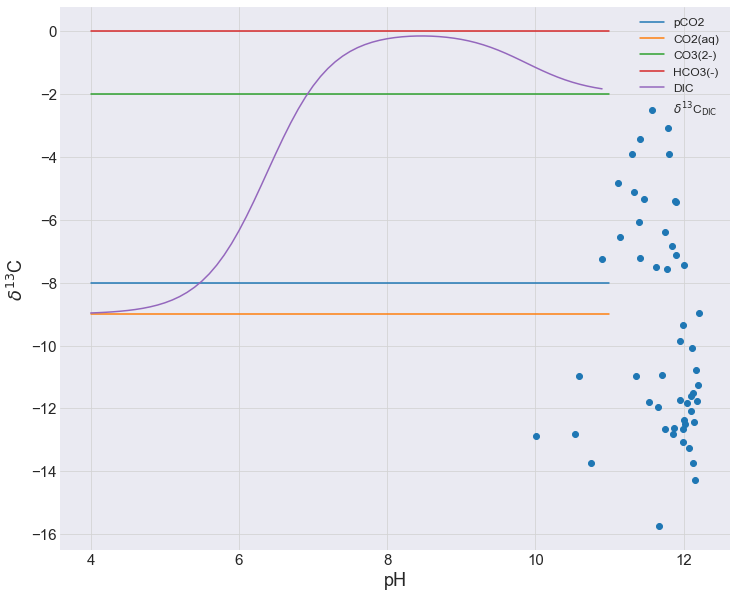

In [127]:
pCO2=(-8,-8)
CO2aq=(-9,-9)
CO3=(-2,-2)
HCO3=(0,0)
ph=(4,11)


plt.figure(figsize=(12,10))
plt.plot(ph,pCO2,label='pCO2')
plt.plot(ph,CO2aq, label='CO2(aq)')
plt.plot(ph,CO3, label='CO3(2-)')
plt.plot(ph,HCO3, label='HCO3(-)')
plt.plot(pH,d13C_DIC,label='DIC')
plt.scatter(pH_calc,data['d13C_DIC'][idx],label='$\delta^{13}$C$_{\mathrm{DIC}}$')
# plt.scatter(pH_calc,d13C_DIC_pred,label='$\delta^{13}$C$_{\mathrm{DIC}}$')



plt.xlabel('pH',fontsize=18)
plt.ylabel('$\delta^{13}$C',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')
plt.legend(loc='best',fontsize='large',frameon=False)

In [128]:
#ph meas vs ph calc
#what temp has the best 1:1 line[]

In [129]:
# #ph meas vs ph res
# plt.figure(figsize=(12,10))
# x=data['pH']
# y=res_ph
# plt.scatter(x,y)

# drop data without DIC and Alk AND pH

In [130]:
#drop data without DIC and Alk AND pH
data1=pd.read_excel('rivers_only.xlsx')
df = pd.DataFrame(data1)
data=df.dropna(subset=['DIC_transformed','Alk_trans','pH'])

In [131]:
# T= 25
import PyCO2SYS as pyco2

kwargs = dict(
    par1 = data['Alk_trans'],
    par1_type = 1, #alkalinity
    par2 = data['DIC_transformed'],
    par2_type = 2, 
    salinity = 0,
    temperature = 25,
)

# Run PyCO2SYS
results = pyco2.sys(**kwargs)
pH_calc = np.array(results['pH'])
#ph_res
res_ph = data['pH']-pH_calc


#calculate d13C_calc
T=25    #degree C
S=0    #salinity rivers = 0
TK = T + 273.15 
DIC=np.array(data['DIC_transformed'])

K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))


H=10**(-pH_calc)  

HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
CO2aq=-9
CO3=-2
HCO3=0
d13C_DIC_pred = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3
#d13C_res
res_d13C = data['d13C_DIC']-d13C_DIC_pred
print(len(res_ph))
print(len(res_d13C))
print(len(data['pH']))
print(len(pH_calc))
print(len(pH_calc2))

386
386
386
386
413


In [132]:
# T = 0


import PyCO2SYS as pyco2

kwargs = dict(
    par1 = data['Alk_trans'],
    par1_type = 1, #alkalinity
    par2 = data['DIC_transformed'],
    par2_type = 2, 
    salinity = 0,
    temperature = 0,
)

# Run PyCO2SYS
results = pyco2.sys(**kwargs)
pH_calc2 = np.array(results['pH'])
#ph_res
res_ph2 = data['pH']-pH_calc2

#calculate d13C_calc
T=0    #degree C
S=0    #salinity rivers = 0
TK = T + 273.15 
DIC=np.array(data['DIC_transformed'])

K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))


H=10**(-pH_calc)  

HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
CO2aq=-9
CO3=-2
HCO3=0
d13C_DIC_pred = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3
#d13C_res
res_d13C2 = data['d13C_DIC']-d13C_DIC_pred
print(np.mean(res_d13C))
print(np.mean(res_d13C2))

-6.6909010478999535
-6.379226092372627


386

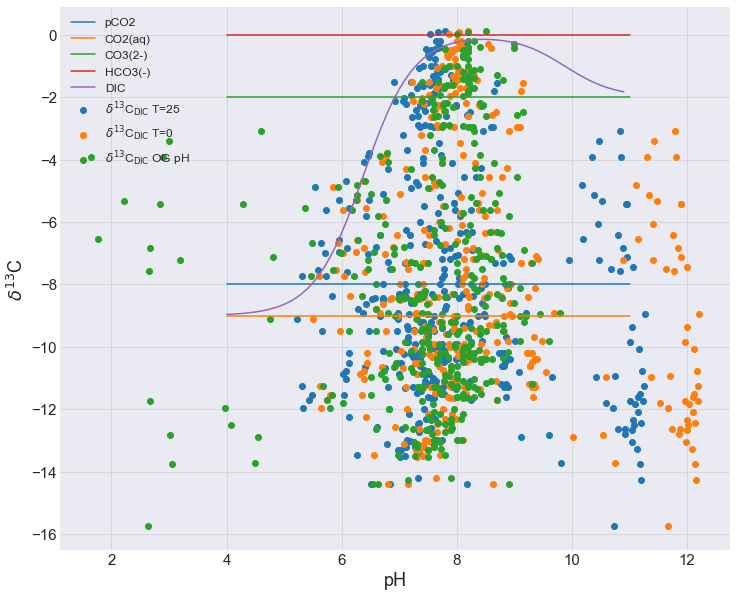

In [133]:
pCO2=(-8,-8)
CO2aq=(-9,-9)
CO3=(-2,-2)
HCO3=(0,0)
ph=(4,11)


plt.figure(figsize=(12,10))
plt.plot(ph,pCO2,label='pCO2')
plt.plot(ph,CO2aq, label='CO2(aq)')
plt.plot(ph,CO3, label='CO3(2-)')
plt.plot(ph,HCO3, label='HCO3(-)')
plt.plot(pH,d13C_DIC,label='DIC')
plt.scatter(pH_calc,data['d13C_DIC'],label='$\delta^{13}$C$_{\mathrm{DIC}}$ T=25')
plt.scatter(pH_calc2,data['d13C_DIC'],label='$\delta^{13}$C$_{\mathrm{DIC}}$ T=0')
plt.scatter(data['pH'],data['d13C_DIC'],label='$\delta^{13}$C$_{\mathrm{DIC}}$ OG pH')



plt.xlabel('pH',fontsize=18)
plt.ylabel('$\delta^{13}$C',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(color='lightgrey')
plt.legend(loc='best',fontsize='large',frameon=False)
len(data['pH'])

In [134]:
#d13C for given pH

#make purple equil line

T=0    #degree C
S=0    #PSS
DIC=2100 #micromol/kg
TK = T + 273.15 
K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))
    
pH = 6
H=10**(-pH)  

HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
CO2aq=-9
CO3=-2
HCO3=0
d13C_DIC_ = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3
d13C_DIC_

-6.345117148148159

# pCO2 and DIC

In [161]:

data1=pd.read_excel('rivers_only.xlsx')
df = pd.DataFrame(data1)
data=df.dropna(subset=['DIC_transformed','pCO2_trans'])

In [167]:
# T= 25
import PyCO2SYS as pyco2

kwargs = dict(
    par1 = data['pCO2_trans'],
    par1_type = 4, #alkalinity
    par2 = data['DIC_transformed'],
    par2_type = 2, 
    salinity = 0,
    temperature = 25,
)

# Run PyCO2SYS
results = pyco2.sys(**kwargs)
pH_calc = np.array(results['pH'])
#ph_res
res_ph = data['pH']-pH_calc


#calculate d13C_calc
T=25    #degree C
S=0    #salinity rivers = 0
TK = T + 273.15 
DIC=np.array(data['DIC_transformed'])

K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))


H=10**(-pH_calc)  

HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
CO2aq=-9
CO3=-2
HCO3=0
d13C_DIC_pred = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3
#d13C_res
res_d13C = data['d13C_DIC']-d13C_DIC_pred

Some input fCO2 values are impossibly high given the input DIC;
returning np.nan.


In [168]:
# T = 0


import PyCO2SYS as pyco2

kwargs = dict(
    par1 = data['pCO2_trans'],
    par1_type = 4, #alkalinity
    par2 = data['DIC_transformed'],
    par2_type = 2, 
    salinity = 0,
    temperature = 0,
)

# Run PyCO2SYS
results = pyco2.sys(**kwargs)
pH_calc2 = np.array(results['pH'])
#ph_res
res_ph2 = data['pH']-pH_calc2

#calculate d13C_calc
T=0    #degree C
S=0    #salinity rivers = 0
TK = T + 273.15 
DIC=np.array(data['DIC_transformed'])

K1 = 10**(-(3633.86/TK - 61.2172 + 9.67770 * np.log(TK)- 0.011555*S + 0.0001152 * S**2))
K2 = 10**(-(471.78/TK + 25.9290 - 3.16967 * np.log(TK) - 0.01781*S + 0.0001122 * S**2))


H=10**(-pH_calc)  

HCO_3 = DIC/(1 + H/K1 + K2/H)
CO_3 = DIC/(1 + H/K2 + H*H/(K1*K2))
CO2 = DIC/(1 + K1/H + K1*K2/(H*H))
CO2aq=-9
CO3=-2
HCO3=0
d13C_DIC_pred = (CO2/DIC)*CO2aq + (CO_3/DIC)*CO3 + (HCO_3/DIC)*HCO3
#d13C_res
res_d13C2 = data['d13C_DIC']-d13C_DIC_pred
print(res_d13C2)

Some input fCO2 values are impossibly high given the input DIC;
returning np.nan.
65      -3.459532
66      -4.896289
67      -3.930619
68      -5.713874
69      -6.432790
          ...    
4403   -11.388133
4404   -10.258762
4405   -12.363994
4406   -10.668510
4454    -7.604408
Name: d13C_DIC, Length: 557, dtype: float64


In [169]:
#T=25
fun=stats.gaussian_kde(res_d13C)
x=np.arange(np.min(res_d13C),np.max(res_d13C),0.1)
y=fun(x)

#T=0
fun=stats.gaussian_kde(res_d13C2)
x2=np.arange(np.min(res_d13C2),np.max(res_d13C2),0.1)
y2=fun(x2)

ValueError: array must not contain infs or NaNs